##### Dataset

In [1]:
# Social_Network_Ads.csv
# location: https://mitu.co.in/dataset

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # visualisation library

##### Read the data

In [5]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### Separate the input and output variables

In [6]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
x.shape

(400, 2)

In [8]:
y.shape

(400,)

In [10]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [15]:
set(y) # check in set as set contain unique elements

{0, 1}

In [16]:
np.unique(y)

array([0, 1], dtype=int64)

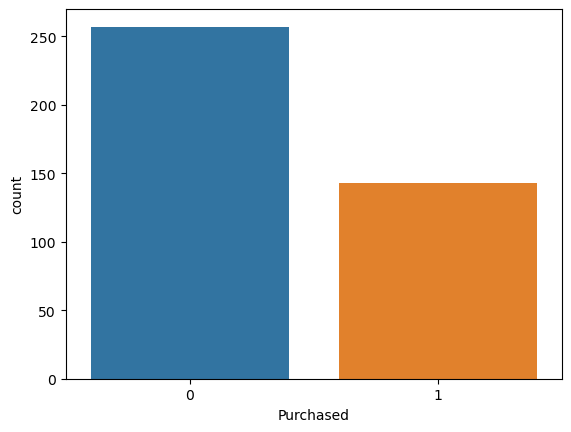

In [18]:
sns.countplot(x=y, palette = 'tab10');

In [19]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

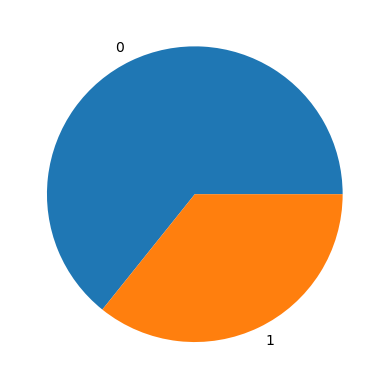

In [20]:
# Pie Chart
plt.pie(y.value_counts(), labels = y.value_counts().index);

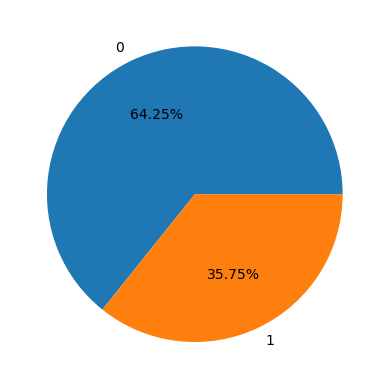

In [27]:
# Percentage 
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%'); # 2.2 means 2 place before . and 2 after . 

In [23]:
z = df['Gender']

In [24]:
z

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [26]:
z.value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

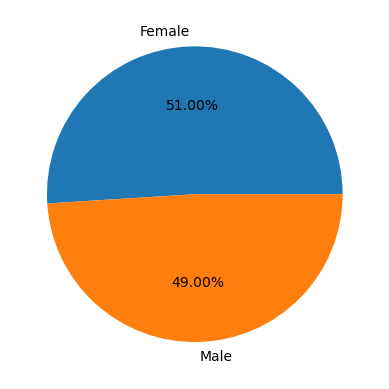

In [25]:
plt.pie(z.value_counts(), labels = z.value_counts().index, autopct = '%2.2f%%');

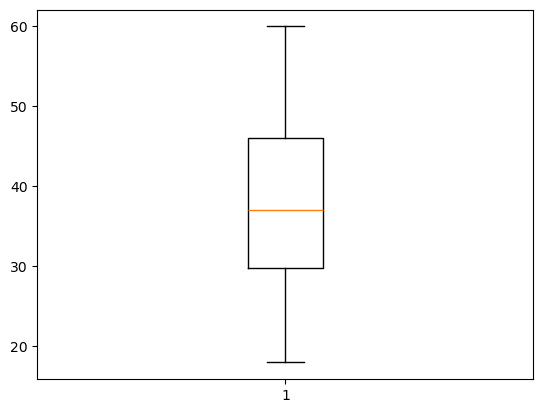

In [28]:
# box plot to show ranges of the data , and show outliers in the data
plt.boxplot(df['Age']);  # orange line show median

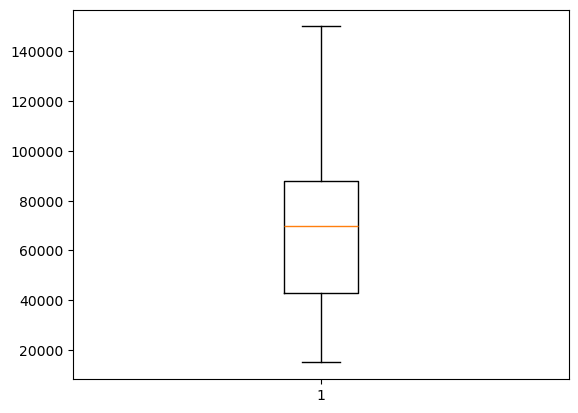

In [29]:
plt.boxplot(df['EstimatedSalary']);

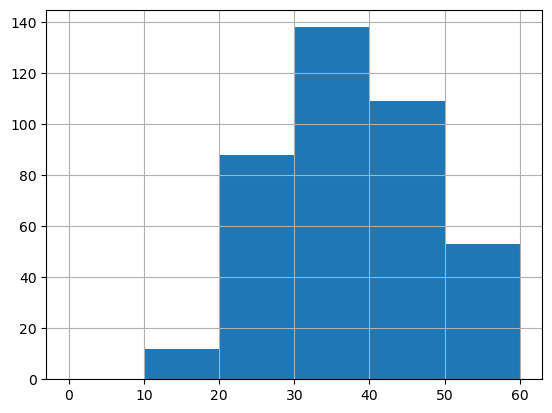

In [38]:
plt.xticks(range(0, 61, 10))
plt.grid()
plt.hist(df['Age'], range (0, 61, 10));


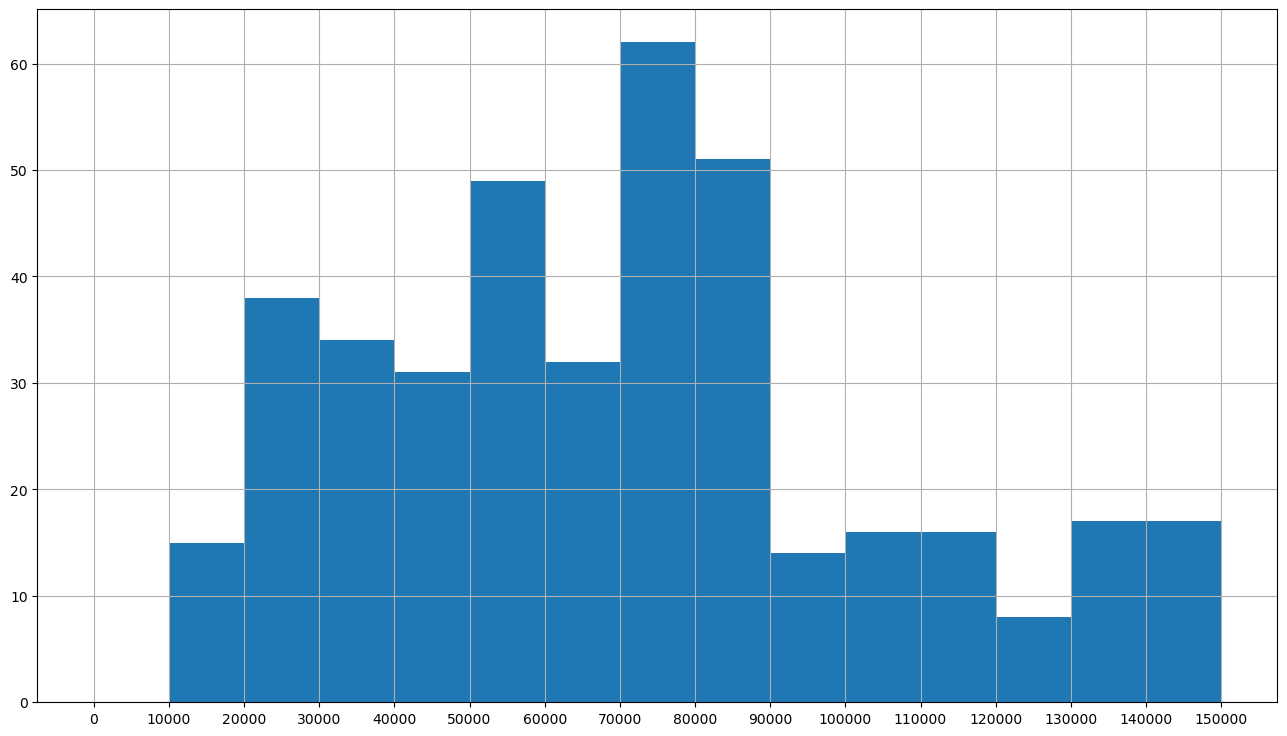

In [40]:
plt.figure(figsize=(16,9))
plt.xticks(range(0, 150001, 10000))
plt.grid()
plt.hist(df['EstimatedSalary'], range (0, 150001, 10000));

In [41]:
df['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


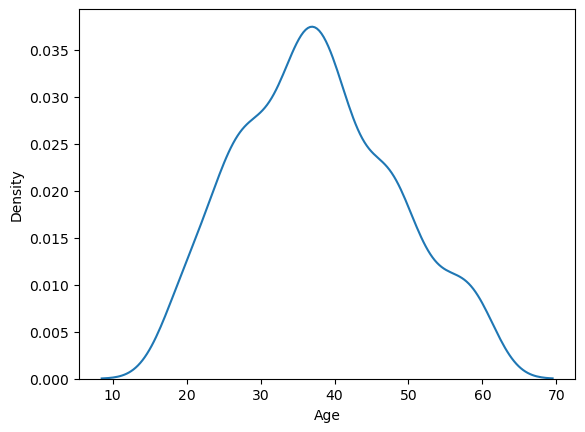

In [42]:
sns.kdeplot(df['Age']);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


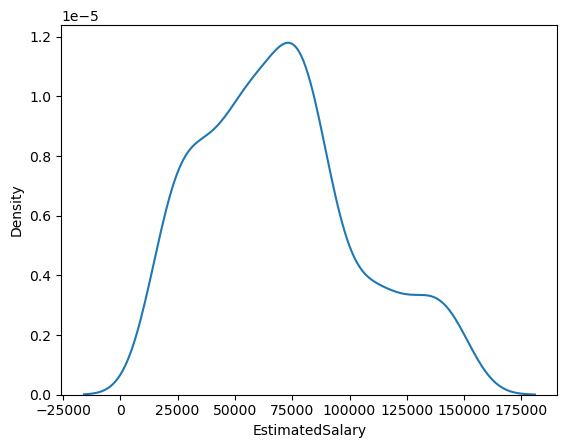

In [43]:
sns.kdeplot(df['EstimatedSalary']); # kernel density estimation

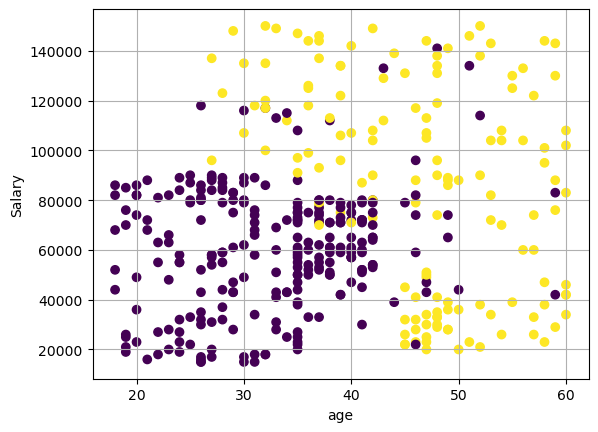

In [46]:
plt.xlabel('age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'] , c = y) # purple is 0, yellow is 1 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


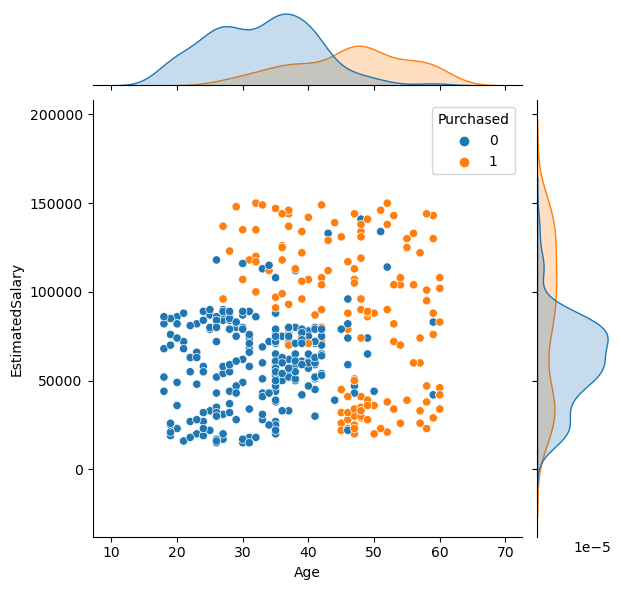

In [48]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased')

##### Feature Scaling 

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [65]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


##### Cross Validation

In [49]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [68]:
x_train.shape

(300, 2)

In [69]:
y_train.shape


(300,)

In [70]:
x_test.shape

(100, 2)

##### Build the model

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
classifier = LogisticRegression()

In [73]:
# train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

##### Predict on the unseen data

In [74]:
y_pred = classifier.predict(x_test)

In [75]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [66]:
# the above because of dominance of the salary , we need to scale the data first , to give equal weightage to all the features
# Do feature scaling as done in cell no 64 , this will scale the features from 0 to 1 

In [76]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [78]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [80]:
# to summarise the output 0 predicted 1 or 0 , 1 predicted 1 or 0  We have confusion matrix

##### Performance evaluation

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [82]:
print(confusion_matrix(y_test, y_pred))

[[67  1]
 [10 22]]


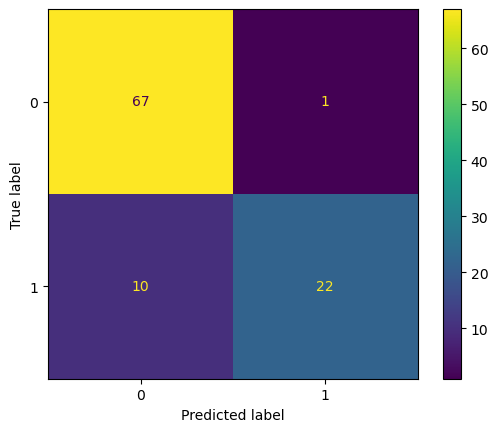

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [86]:
accuracy_score(y_test, y_pred)

0.89

In [87]:
cm = confusion_matrix(y_test, y_pred)

In [89]:
# using formula
cm.diagonal().sum() / cm.sum()

0.89

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [101]:
# recall means individual class accuracy 
# 0 class accuracy is 0.99 it is good, is called sensitivity of algorithms
# but 1 class accuracy is 0.69 it is not good , it is called speciticity of the algorithm 
# Precision:calculate on predicted data :  0 class precision -- Positive predictive values 67 /77
#           : 1 class precision:  Negative predictive values 22/23
# f1 score -- harmonic mean of precision and recall  
# all values should be above 80 %  to be a good model
# balance of accuracy of every class should be there above 80% 

In [102]:
# manualy check the above 

In [103]:
# accuracy of class 0 / sensitivity of algorithm 
r0 = 67/68
r0

0.9852941176470589

In [104]:
# accuracy of class 1 / specificity of algorithm 
r1 = 22/32
r1

0.6875

In [105]:
# Precision - 0 / Positive Predictive Value
p0 = 67/77
p0

0.8701298701298701

In [106]:
# Precision - 1 / Negative Predictive Value
p1 = 22/23
p1

0.9565217391304348

In [107]:
# f-1 score - 0
2 * p0 *r0 / (p0 + r0)

0.9241379310344828

In [108]:
# f-1 score - 1
2 * p1 *r1 / (p1 + r1)

0.8

In [109]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

##### Prediction on unseen data

In [110]:
new = np.array([[23,45000],[54,148000],[37,63000]])

In [112]:
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [111]:
classifier.predict(new)

array([1, 1, 1], dtype=int64)

In [113]:
# scaling  the data is required 
# scaler is already fitted 
new_scaled = scaler.transform(new)
new_scaled

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [114]:
classifier.predict(new_scaled)

array([0, 1, 0], dtype=int64)

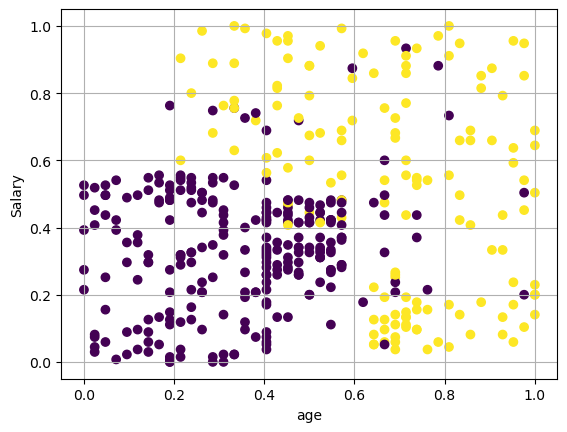

In [116]:
# after scale also the plot is not changed
plt.xlabel('age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1] , c = y)

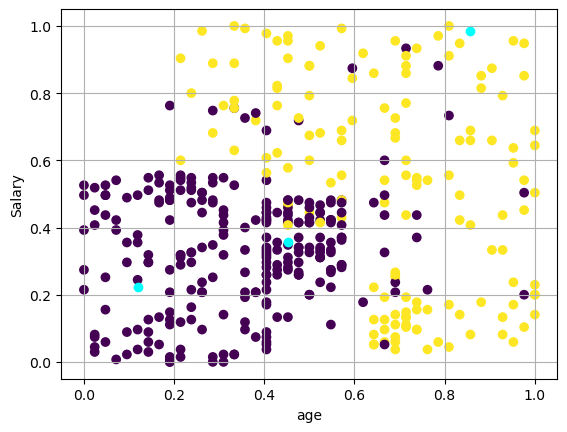

In [117]:
plt.xlabel('age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1] , c = y)
plt.scatter(new_scaled[:,0], new_scaled[:,1] , color = 'cyan')

In [118]:
classifier.predict_proba(new_scaled)

array([[0.94995459, 0.05004541],
       [0.06890179, 0.93109821],
       [0.72598556, 0.27401444]])